### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm

### Data Cleaning

In [2]:
# Importing in the dataset
df = pd.read_csv("hotel5_data.csv")
df.shape

(1054, 18)

Dropping duplicate entries as well as excluding apartment entries from the data because they are different to hotels. 
We are also getting rid of the Review Title Column because we already have another column which holds the ratings making this column redundant 



In [3]:
df.drop_duplicates(inplace=True)
df = df[~df['Name'].str.contains('apartment', case=False, na=False)] #Dropping rows where the Name column contains the string 'apartment'

df.drop(['Review Title'],axis=1,inplace=True) #Dropping the Review Title column

df.head(10)

Name  Price Rating   Review Count  \
0                   The Orchard Hotel Lahore  US$61    9.5    183 reviews   
1             Rose Palace Hotel, Garden Town  US$20    8.3  1,630 reviews   
2                          Hotel White Pearl  US$17    6.6    304 reviews   
3                 Rose Palace Hotel, Liberty  US$21    8.3  1,769 reviews   
4                     Park Lane Hotel Lahore  US$56    8.2  2,185 reviews   
5  Best Western Premier Hotel Gulberg Lahore  US$60    8.4  1,589 reviews   
6                  Eden Plus Executive Hotel  US$12     10      2 reviews   
7        Ramada by Wyndham Lahore Gulberg II  US$90    9.0  1,173 reviews   
8              2 bedrooms house for families  US$23     10       1 review   
9                       Shelton Hotel Lahore  US$18    7.8    508 reviews   

                 Distance                                               Beds  \
0   4.2 miles from centre                           1 extra-large double bed   
1   4.1 miles from centre                           1 extra-large double bed   
2   6.8 miles from centre                                 1 large double bed   
3   3.3 miles from centre                                 1 large double bed   
4   4.3 miles from centre                                 Multiple bed types   
5   4.4 miles from centre                           1 extra-large double bed   
6   7.5 miles from centre                                      2 single beds   
7   4.2 miles from centre                           1 extra-large double bed   
8  11.7 miles from centre  Entire villa•2 bedrooms•2 living rooms•3 bathr...   
9   7.3 miles from centre                                       1 double bed   

                        Room Type                 Sustainable  \
0                     Deluxe Room  Travel Sustainable Level 3   
1                     Deluxe Room  Travel Sustainable Level 3   
2            Standard Double Room  Travel Sustainable Level 2   
3                     Deluxe Room  Travel Sustainable Level 3   
4                Deluxe King Room                   Not Found   
5                     Deluxe King  Travel Sustainable Level 3   
6      Deluxe Double or Twin Room  Travel Sustainable Level 3   
7  Deluxe King Room - Non-Smoking  Travel Sustainable Level 3   
8               Two-Bedroom Villa                   Not Found   
9              Deluxe Double Room                   Not Found   

           Cancellation   City,  Staff  Facilities  Cleanliness  Comfort  \
0     Free cancellation  Lahore    9.6         9.4          9.5      9.5   
1     Free cancellation  Lahore    8.9         8.3          8.2      8.3   
2     Free cancellation  Lahore    7.5         6.9          7.2      7.3   
3     Free cancellation  Lahore    8.9         8.1          8.2      8.3   
4     Free cancellation  Lahore    8.7         8.1          8.3      8.4   
5     Free cancellation  Lahore    8.6         8.6          8.8      8.8   
6     Free cancellation  Lahore   10.0        10.0         10.0     10.0   
7     Free cancellation  Lahore    9.2         8.9          9.0      9.1   
8  No Free Cancellation  Lahore   10.0        10.0         10.0     10.0   
9  No Free Cancellation  Lahore    8.3         7.8          8.1      8.2   

   Value for money  Location  Free WiFi  
0              9.4       9.7        9.0  
1              8.3       8.3        8.5  
2              7.1       7.9        7.9  
3              8.3       9.1        8.4  
4              8.1       9.0        7.9  
5              8.3       8.9        8.0  
6             10.0      10.0       -1.0  
7              8.6       8.7        8.7  
8             10.0      10.0       -1.0  
9              8.1       7.9       -1.0

Converting the `Price` column into numeric, usable values. For this, we are using Regexes to convert a string such as 'PKR 17,500' to an integer value '17500'. 

In [4]:
df['Price'] = df['Price'].replace({'US': '', '[\$,]': ''}, regex=True).astype(int) #PKR is replaced with an empty string, and symbols $ and , are replaced with an empty string as well
#Multiplying the price with the exchange rate of 285.22 as of end of 2023 to convert it to PKR
df['Price'] = df['Price'] * 285.22
df.head(10)

Name     Price Rating   Review Count  \
0                   The Orchard Hotel Lahore  17398.42    9.5    183 reviews   
1             Rose Palace Hotel, Garden Town   5704.40    8.3  1,630 reviews   
2                          Hotel White Pearl   4848.74    6.6    304 reviews   
3                 Rose Palace Hotel, Liberty   5989.62    8.3  1,769 reviews   
4                     Park Lane Hotel Lahore  15972.32    8.2  2,185 reviews   
5  Best Western Premier Hotel Gulberg Lahore  17113.20    8.4  1,589 reviews   
6                  Eden Plus Executive Hotel   3422.64     10      2 reviews   
7        Ramada by Wyndham Lahore Gulberg II  25669.80    9.0  1,173 reviews   
8              2 bedrooms house for families   6560.06     10       1 review   
9                       Shelton Hotel Lahore   5133.96    7.8    508 reviews   

                 Distance                                               Beds  \
0   4.2 miles from centre                           1 extra-large double bed   
1   4.1 miles from centre                           1 extra-large double bed   
2   6.8 miles from centre                                 1 large double bed   
3   3.3 miles from centre                                 1 large double bed   
4   4.3 miles from centre                                 Multiple bed types   
5   4.4 miles from centre                           1 extra-large double bed   
6   7.5 miles from centre                                      2 single beds   
7   4.2 miles from centre                           1 extra-large double bed   
8  11.7 miles from centre  Entire villa•2 bedrooms•2 living rooms•3 bathr...   
9   7.3 miles from centre                                       1 double bed   

                        Room Type                 Sustainable  \
0                     Deluxe Room  Travel Sustainable Level 3   
1                     Deluxe Room  Travel Sustainable Level 3   
2            Standard Double Room  Travel Sustainable Level 2   
3                     Deluxe Room  Travel Sustainable Level 3   
4                Deluxe King Room                   Not Found   
5                     Deluxe King  Travel Sustainable Level 3   
6      Deluxe Double or Twin Room  Travel Sustainable Level 3   
7  Deluxe King Room - Non-Smoking  Travel Sustainable Level 3   
8               Two-Bedroom Villa                   Not Found   
9              Deluxe Double Room                   Not Found   

           Cancellation   City,  Staff  Facilities  Cleanliness  Comfort  \
0     Free cancellation  Lahore    9.6         9.4          9.5      9.5   
1     Free cancellation  Lahore    8.9         8.3          8.2      8.3   
2     Free cancellation  Lahore    7.5         6.9          7.2      7.3   
3     Free cancellation  Lahore    8.9         8.1          8.2      8.3   
4     Free cancellation  Lahore    8.7         8.1          8.3      8.4   
5     Free cancellation  Lahore    8.6         8.6          8.8      8.8   
6     Free cancellation  Lahore   10.0        10.0         10.0     10.0   
7     Free cancellation  Lahore    9.2         8.9          9.0      9.1   
8  No Free Cancellation  Lahore   10.0        10.0         10.0     10.0   
9  No Free Cancellation  Lahore    8.3         7.8          8.1      8.2   

   Value for money  Location  Free WiFi  
0              9.4       9.7        9.0  
1              8.3       8.3        8.5  
2              7.1       7.9        7.9  
3              8.3       9.1        8.4  
4              8.1       9.0        7.9  
5              8.3       8.9        8.0  
6             10.0      10.0       -1.0  
7              8.6       8.7        8.7  
8             10.0      10.0       -1.0  
9              8.1       7.9       -1.0

The `Review Count` Column is also converted into having numeric, usable values. 

In [5]:
df['Review Count'] = df['Review Count'].str.replace(',', '') #Commas are removed
df['Review Count'] = pd.to_numeric(df['Review Count'].str.extract('(\d*)')[0], errors='coerce', downcast='integer').fillna(-1).astype(int) 
#The digits from the string are extracted and converted into integers, invalid entries are assigned -1. 

df.head(10)

Name     Price Rating  Review Count  \
0                   The Orchard Hotel Lahore  17398.42    9.5           183   
1             Rose Palace Hotel, Garden Town   5704.40    8.3          1630   
2                          Hotel White Pearl   4848.74    6.6           304   
3                 Rose Palace Hotel, Liberty   5989.62    8.3          1769   
4                     Park Lane Hotel Lahore  15972.32    8.2          2185   
5  Best Western Premier Hotel Gulberg Lahore  17113.20    8.4          1589   
6                  Eden Plus Executive Hotel   3422.64     10             2   
7        Ramada by Wyndham Lahore Gulberg II  25669.80    9.0          1173   
8              2 bedrooms house for families   6560.06     10             1   
9                       Shelton Hotel Lahore   5133.96    7.8           508   

                 Distance                                               Beds  \
0   4.2 miles from centre                           1 extra-large double bed   
1   4.1 miles from centre                           1 extra-large double bed   
2   6.8 miles from centre                                 1 large double bed   
3   3.3 miles from centre                                 1 large double bed   
4   4.3 miles from centre                                 Multiple bed types   
5   4.4 miles from centre                           1 extra-large double bed   
6   7.5 miles from centre                                      2 single beds   
7   4.2 miles from centre                           1 extra-large double bed   
8  11.7 miles from centre  Entire villa•2 bedrooms•2 living rooms•3 bathr...   
9   7.3 miles from centre                                       1 double bed   

                        Room Type                 Sustainable  \
0                     Deluxe Room  Travel Sustainable Level 3   
1                     Deluxe Room  Travel Sustainable Level 3   
2            Standard Double Room  Travel Sustainable Level 2   
3                     Deluxe Room  Travel Sustainable Level 3   
4                Deluxe King Room                   Not Found   
5                     Deluxe King  Travel Sustainable Level 3   
6      Deluxe Double or Twin Room  Travel Sustainable Level 3   
7  Deluxe King Room - Non-Smoking  Travel Sustainable Level 3   
8               Two-Bedroom Villa                   Not Found   
9              Deluxe Double Room                   Not Found   

           Cancellation   City,  Staff  Facilities  Cleanliness  Comfort  \
0     Free cancellation  Lahore    9.6         9.4          9.5      9.5   
1     Free cancellation  Lahore    8.9         8.3          8.2      8.3   
2     Free cancellation  Lahore    7.5         6.9          7.2      7.3   
3     Free cancellation  Lahore    8.9         8.1          8.2      8.3   
4     Free cancellation  Lahore    8.7         8.1          8.3      8.4   
5     Free cancellation  Lahore    8.6         8.6          8.8      8.8   
6     Free cancellation  Lahore   10.0        10.0         10.0     10.0   
7     Free cancellation  Lahore    9.2         8.9          9.0      9.1   
8  No Free Cancellation  Lahore   10.0        10.0         10.0     10.0   
9  No Free Cancellation  Lahore    8.3         7.8          8.1      8.2   

   Value for money  Location  Free WiFi  
0              9.4       9.7        9.0  
1              8.3       8.3        8.5  
2              7.1       7.9        7.9  
3              8.3       9.1        8.4  
4              8.1       9.0        7.9  
5              8.3       8.9        8.0  
6             10.0      10.0       -1.0  
7              8.6       8.7        8.7  
8             10.0      10.0       -1.0  
9              8.1       7.9       -1.0

The `Distance` is converted into numeric, usable float type values

In [6]:
df['Distance'] = pd.to_numeric(df['Distance'].str.extract('([\d.]*)')[0], errors='coerce').fillna(0).astype(float)
#The digits from the string are extracted and converted into floating point values, invalid entries are assigned 0 

df.head(10)

Name     Price Rating  Review Count  \
0                   The Orchard Hotel Lahore  17398.42    9.5           183   
1             Rose Palace Hotel, Garden Town   5704.40    8.3          1630   
2                          Hotel White Pearl   4848.74    6.6           304   
3                 Rose Palace Hotel, Liberty   5989.62    8.3          1769   
4                     Park Lane Hotel Lahore  15972.32    8.2          2185   
5  Best Western Premier Hotel Gulberg Lahore  17113.20    8.4          1589   
6                  Eden Plus Executive Hotel   3422.64     10             2   
7        Ramada by Wyndham Lahore Gulberg II  25669.80    9.0          1173   
8              2 bedrooms house for families   6560.06     10             1   
9                       Shelton Hotel Lahore   5133.96    7.8           508   

   Distance                                               Beds  \
0       4.2                           1 extra-large double bed   
1       4.1                           1 extra-large double bed   
2       6.8                                 1 large double bed   
3       3.3                                 1 large double bed   
4       4.3                                 Multiple bed types   
5       4.4                           1 extra-large double bed   
6       7.5                                      2 single beds   
7       4.2                           1 extra-large double bed   
8      11.7  Entire villa•2 bedrooms•2 living rooms•3 bathr...   
9       7.3                                       1 double bed   

                        Room Type                 Sustainable  \
0                     Deluxe Room  Travel Sustainable Level 3   
1                     Deluxe Room  Travel Sustainable Level 3   
2            Standard Double Room  Travel Sustainable Level 2   
3                     Deluxe Room  Travel Sustainable Level 3   
4                Deluxe King Room                   Not Found   
5                     Deluxe King  Travel Sustainable Level 3   
6      Deluxe Double or Twin Room  Travel Sustainable Level 3   
7  Deluxe King Room - Non-Smoking  Travel Sustainable Level 3   
8               Two-Bedroom Villa                   Not Found   
9              Deluxe Double Room                   Not Found   

           Cancellation   City,  Staff  Facilities  Cleanliness  Comfort  \
0     Free cancellation  Lahore    9.6         9.4          9.5      9.5   
1     Free cancellation  Lahore    8.9         8.3          8.2      8.3   
2     Free cancellation  Lahore    7.5         6.9          7.2      7.3   
3     Free cancellation  Lahore    8.9         8.1          8.2      8.3   
4     Free cancellation  Lahore    8.7         8.1          8.3      8.4   
5     Free cancellation  Lahore    8.6         8.6          8.8      8.8   
6     Free cancellation  Lahore   10.0        10.0         10.0     10.0   
7     Free cancellation  Lahore    9.2         8.9          9.0      9.1   
8  No Free Cancellation  Lahore   10.0        10.0         10.0     10.0   
9  No Free Cancellation  Lahore    8.3         7.8          8.1      8.2   

   Value for money  Location  Free WiFi  
0              9.4       9.7        9.0  
1              8.3       8.3        8.5  
2              7.1       7.9        7.9  
3              8.3       9.1        8.4  
4              8.1       9.0        7.9  
5              8.3       8.9        8.0  
6             10.0      10.0       -1.0  
7              8.6       8.7        8.7  
8             10.0      10.0       -1.0  
9              8.1       7.9       -1.0

Plotting a histogram which shows the distances of hotels from the centre of the city and the frequency of these distances amongst our data points. Notice the presence of `outliers`

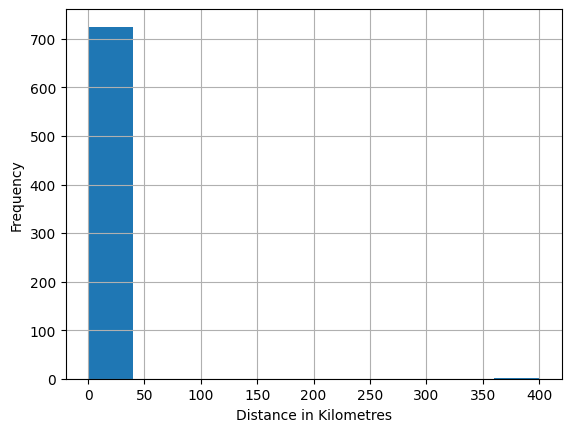

In [7]:
df['Distance'].hist()
plt.xlabel('Distance in Kilometres')
plt.ylabel('Frequency')


plt.show()

Removing the `outliers` and plotting a cleaner looking histogram

Text(0, 0.5, 'Frequency')

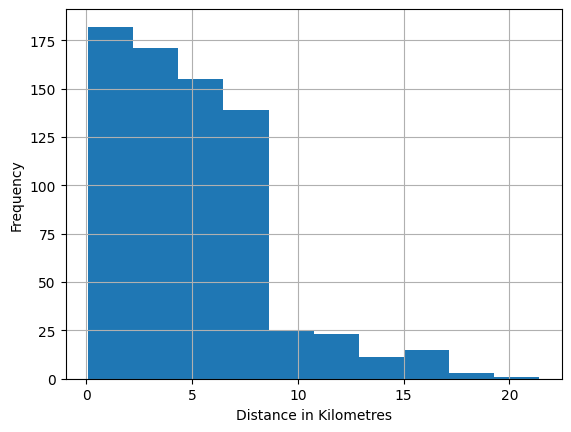

In [8]:
df = df[df['Distance'] <= 120]
df['Distance'].hist()
plt.xlabel('Distance in Kilometres')
plt.ylabel('Frequency')

From the above histogram we can see that the majority of hotels are located close to the city centre which are busy areas with all kinds of facilities such as transport, healthcare and shopping areas available. 

Converting the `Cancellation` column to binary numeric values. 

In [9]:
df['Cancellation'] = df['Cancellation'].apply(lambda x: 0 if str(x).lower() == 'no free cancellation' else 1)
#Converting each element to lower case and setting the value to 0 if it is equal to "no free cancellation", otherwise setting it to 1

df.head(10)

Name     Price Rating  Review Count  \
0                   The Orchard Hotel Lahore  17398.42    9.5           183   
1             Rose Palace Hotel, Garden Town   5704.40    8.3          1630   
2                          Hotel White Pearl   4848.74    6.6           304   
3                 Rose Palace Hotel, Liberty   5989.62    8.3          1769   
4                     Park Lane Hotel Lahore  15972.32    8.2          2185   
5  Best Western Premier Hotel Gulberg Lahore  17113.20    8.4          1589   
6                  Eden Plus Executive Hotel   3422.64     10             2   
7        Ramada by Wyndham Lahore Gulberg II  25669.80    9.0          1173   
8              2 bedrooms house for families   6560.06     10             1   
9                       Shelton Hotel Lahore   5133.96    7.8           508   

   Distance                                               Beds  \
0       4.2                           1 extra-large double bed   
1       4.1                           1 extra-large double bed   
2       6.8                                 1 large double bed   
3       3.3                                 1 large double bed   
4       4.3                                 Multiple bed types   
5       4.4                           1 extra-large double bed   
6       7.5                                      2 single beds   
7       4.2                           1 extra-large double bed   
8      11.7  Entire villa•2 bedrooms•2 living rooms•3 bathr...   
9       7.3                                       1 double bed   

                        Room Type                 Sustainable  Cancellation  \
0                     Deluxe Room  Travel Sustainable Level 3             1   
1                     Deluxe Room  Travel Sustainable Level 3             1   
2            Standard Double Room  Travel Sustainable Level 2             1   
3                     Deluxe Room  Travel Sustainable Level 3             1   
4                Deluxe King Room                   Not Found             1   
5                     Deluxe King  Travel Sustainable Level 3             1   
6      Deluxe Double or Twin Room  Travel Sustainable Level 3             1   
7  Deluxe King Room - Non-Smoking  Travel Sustainable Level 3             1   
8               Two-Bedroom Villa                   Not Found             0   
9              Deluxe Double Room                   Not Found             0   

    City,  Staff  Facilities  Cleanliness  Comfort  Value for money  Location  \
0  Lahore    9.6         9.4          9.5      9.5              9.4       9.7   
1  Lahore    8.9         8.3          8.2      8.3              8.3       8.3   
2  Lahore    7.5         6.9          7.2      7.3              7.1       7.9   
3  Lahore    8.9         8.1          8.2      8.3              8.3       9.1   
4  Lahore    8.7         8.1          8.3      8.4              8.1       9.0   
5  Lahore    8.6         8.6          8.8      8.8              8.3       8.9   
6  Lahore   10.0        10.0         10.0     10.0             10.0      10.0   
7  Lahore    9.2         8.9          9.0      9.1              8.6       8.7   
8  Lahore   10.0        10.0         10.0     10.0             10.0      10.0   
9  Lahore    8.3         7.8          8.1      8.2              8.1       7.9   

   Free WiFi  
0        9.0  
1        8.5  
2        7.9  
3        8.4  
4        7.9  
5        8.0  
6       -1.0  
7        8.7  
8       -1.0  
9       -1.0

Creating `One Hot Vectors` for each of the cities so that mapping is easier

In [10]:
#Creating one hot vectors for the cities where each column name would correspond to a city and the value would be 1 
#if the hotel is in that city, otherwise 0

#First renaming the City, column to City
df.rename(columns={'City,': 'City'}, inplace=True)

#Getting a list of all the cities
cities = df['City'].unique()
print(cities)

#Creating a new column for each city
for city in cities:
    df[city] = df['City'].apply(lambda x: 1 if x == city else 0)

df

['Lahore' 'Islamabad' 'Karachi' 'Murree' 'Multan' 'Rawalpindi']


Name     Price     Rating  Review Count  \
0           The Orchard Hotel Lahore  17398.42        9.5           183   
1     Rose Palace Hotel, Garden Town   5704.40        8.3          1630   
2                  Hotel White Pearl   4848.74        6.6           304   
3         Rose Palace Hotel, Liberty   5989.62        8.3          1769   
4             Park Lane Hotel Lahore  15972.32        8.2          2185   
...                              ...       ...        ...           ...   
1043       Hotel Islamabad Metro Inn   6274.84        7.0             1   
1045                       Rex Hotel   4848.74        3.3             3   
1049                Bed & Break Fast   3707.86        6.0             3   
1050                   Hotel Welcome   5419.18  Not Found            -1   
1053               Grace Crown Hotel   6845.28        6.3            21   

      Distance                      Beds             Room Type  \
0          4.2  1 extra-large double bed           Deluxe Room   
1          4.1  1 extra-large double bed           Deluxe Room   
2          6.8        1 large double bed  Standard Double Room   
3          3.3        1 large double bed           Deluxe Room   
4          4.3        Multiple bed types      Deluxe King Room   
...        ...                       ...                   ...   
1043       5.2             2 single beds             Twin Room   
1045       0.8             4 single beds           Deluxe Room   
1049      11.3              1 double bed    Deluxe Double Room   
1050       0.8             2 single beds   Double or Twin Room   
1053       1.0             2 double beds    Deluxe Double Room   

                     Sustainable  Cancellation        City  ...  Comfort  \
0     Travel Sustainable Level 3             1      Lahore  ...      9.5   
1     Travel Sustainable Level 3             1      Lahore  ...      8.3   
2     Travel Sustainable Level 2             1      Lahore  ...      7.3   
3     Travel Sustainable Level 3             1      Lahore  ...      8.3   
4                      Not Found             1      Lahore  ...      8.4   
...                          ...           ...         ...  ...      ...   
1043                   Not Found             1  Rawalpindi  ...      7.5   
1045                   Not Found             0  Rawalpindi  ...      2.5   
1049                   Not Found             0  Rawalpindi  ...     -1.0   
1050                   Not Found             0  Rawalpindi  ...     -1.0   
1053                   Not Found             1  Rawalpindi  ...      7.0   

      Value for money  Location  Free WiFi  Lahore  Islamabad  Karachi  \
0                 9.4       9.7        9.0       1          0        0   
1                 8.3       8.3        8.5       1          0        0   
2                 7.1       7.9        7.9       1          0        0   
3                 8.3       9.1        8.4       1          0        0   
4                 8.1       9.0        7.9       1          0        0   
...               ...       ...        ...     ...        ...      ...   
1043              7.5      10.0       -1.0       0          0        0   
1045              5.0       5.8       -1.0       0          0        0   
1049             -1.0      -1.0       -1.0       0          0        0   
1050             -1.0      -1.0       -1.0       0          0        0   
1053              6.7       7.6        8.8       0          0        0   

      Murree  Multan  Rawalpindi  
0          0       0           0  
1          0       0           0  
2          0       0           0  
3          0       0           0  
4          0       0           0  
...      ...     ...         ...  
1043       0       0           1  
1045       0       0           1  
1049       0       0           1  
1050       0       0           1  
1053       0       0           1  

[725 rows x 23 columns]

Plotting a horizontal bar graph of the ten most common bed types found in hotels

Text(0.5, 0, 'Frequency')

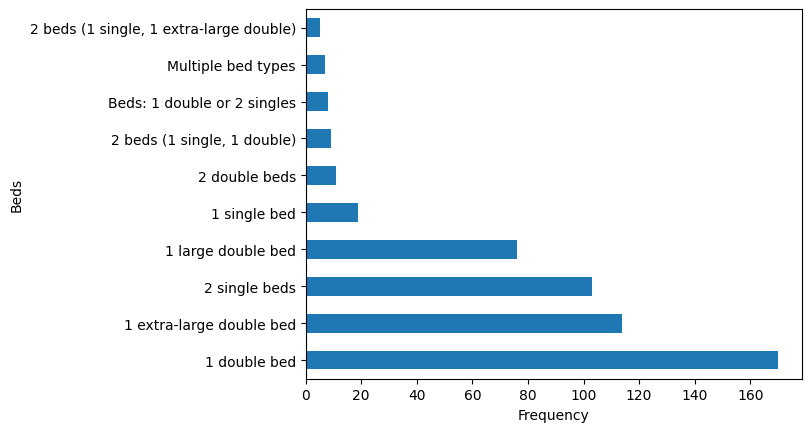

In [11]:
top_10_counts = df['Beds'].value_counts().head(10).plot(kind='barh')

plt.xlabel('Frequency')

Converting the `Sustainable` column into numeric, usable values. The column has values in the form "Travel Sustainable Level 3" and we are extracting the last digit. 

In [12]:
df['Sustainable'] = df['Sustainable'].apply(lambda x: int(x.split()[-1]) if pd.notnull(x) and x.split()[-1].isdigit() else 0)
#Split the string and if the last word is a digit, then replace the index with that digit, otherwise replace the index with 0

df.head(10)

Name     Price Rating  Review Count  \
0                   The Orchard Hotel Lahore  17398.42    9.5           183   
1             Rose Palace Hotel, Garden Town   5704.40    8.3          1630   
2                          Hotel White Pearl   4848.74    6.6           304   
3                 Rose Palace Hotel, Liberty   5989.62    8.3          1769   
4                     Park Lane Hotel Lahore  15972.32    8.2          2185   
5  Best Western Premier Hotel Gulberg Lahore  17113.20    8.4          1589   
6                  Eden Plus Executive Hotel   3422.64     10             2   
7        Ramada by Wyndham Lahore Gulberg II  25669.80    9.0          1173   
8              2 bedrooms house for families   6560.06     10             1   
9                       Shelton Hotel Lahore   5133.96    7.8           508   

   Distance                                               Beds  \
0       4.2                           1 extra-large double bed   
1       4.1                           1 extra-large double bed   
2       6.8                                 1 large double bed   
3       3.3                                 1 large double bed   
4       4.3                                 Multiple bed types   
5       4.4                           1 extra-large double bed   
6       7.5                                      2 single beds   
7       4.2                           1 extra-large double bed   
8      11.7  Entire villa•2 bedrooms•2 living rooms•3 bathr...   
9       7.3                                       1 double bed   

                        Room Type  Sustainable  Cancellation    City  ...  \
0                     Deluxe Room            3             1  Lahore  ...   
1                     Deluxe Room            3             1  Lahore  ...   
2            Standard Double Room            2             1  Lahore  ...   
3                     Deluxe Room            3             1  Lahore  ...   
4                Deluxe King Room            0             1  Lahore  ...   
5                     Deluxe King            3             1  Lahore  ...   
6      Deluxe Double or Twin Room            3             1  Lahore  ...   
7  Deluxe King Room - Non-Smoking            3             1  Lahore  ...   
8               Two-Bedroom Villa            0             0  Lahore  ...   
9              Deluxe Double Room            0             0  Lahore  ...   

   Comfort  Value for money  Location  Free WiFi  Lahore  Islamabad  Karachi  \
0      9.5              9.4       9.7        9.0       1          0        0   
1      8.3              8.3       8.3        8.5       1          0        0   
2      7.3              7.1       7.9        7.9       1          0        0   
3      8.3              8.3       9.1        8.4       1          0        0   
4      8.4              8.1       9.0        7.9       1          0        0   
5      8.8              8.3       8.9        8.0       1          0        0   
6     10.0             10.0      10.0       -1.0       1          0        0   
7      9.1              8.6       8.7        8.7       1          0        0   
8     10.0             10.0      10.0       -1.0       1          0        0   
9      8.2              8.1       7.9       -1.0       1          0        0   

   Murree  Multan  Rawalpindi  
0       0       0           0  
1       0       0           0  
2       0       0           0  
3       0       0           0  
4       0       0           0  
5       0       0           0  
6       0       0           0  
7       0       0           0  
8       0       0           0  
9       0       0           0  

[10 rows x 23 columns]

Adding a new `Capacity` column which represents the number of people a particular room can facilitate. This can give some measure of the average cost per person for the room as well. 

In [13]:
df['Capacity'] = df['Beds'].apply(lambda x: 2 if pd.notnull(x) and 'double' in x.lower() else (1 if pd.notnull(x) and 'single' in x.lower() else x))
df['Number of Beds'] = df['Beds'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) and x.split()[0].isdigit() else 1)
df['Capacity']  = df['Capacity']*df['Number of Beds']
#We find the type of beds from the 'Beds' column by checking if 'single' is present or 'double' is present at the index 
#We then find the number of beds from the 'Beds' column by accessing the digit at the first word 
#We then multiply the type of bed and the number of beds to get the capacity, e.g a double bed (2) x 2 beds = capacity of 4 people

print(df['Capacity'].value_counts())

#Dropping the outlier values seen from the value counts
df['Capacity'] = df['Capacity'].drop(df[df['Capacity'] == 'Multiple bed types'].index)
df['Capacity'] = df['Capacity'].drop(df[df['Capacity'] == 'Entire studio•1 bathroom•1,614.6feet²Multiple bed types'].index)
df['Capacity'] = df['Capacity'].drop(df[df['Capacity'] == '1 sofa bed'].index)

#Converting the Capacity column to integers
df['Capacity'] = df['Capacity'].dropna()
try:
    df['Capacity'] = df['Capacity'].astype(int)
except:
    pass
# df['Capacity'] = df['Capacity'].astype(int)

#Removing the capacity values that are greater than 8
df = df[df['Capacity'] <= 8]

print(df['Capacity'].value_counts())

Capacity
2                                                          619
4                                                           50
1                                                           23
6                                                           12
Multiple bed types                                           7
3                                                            5
8                                                            3
26                                                           1
Entire studio•1 bathroom•1,614.6feet²Multiple bed types      1
10                                                           1
18                                                           1
1 sofa bed                                                   1
Name: count, dtype: int64
Capacity
2    619
4     50
1     23
6     12
3      5
8      3
Name: count, dtype: int64


Plotting a horizontal bar graph of the 20 most frequent types of beds in the data. This gives us the insight of what types of beds are more common in hotels

Text(0.5, 0, 'Frequency')

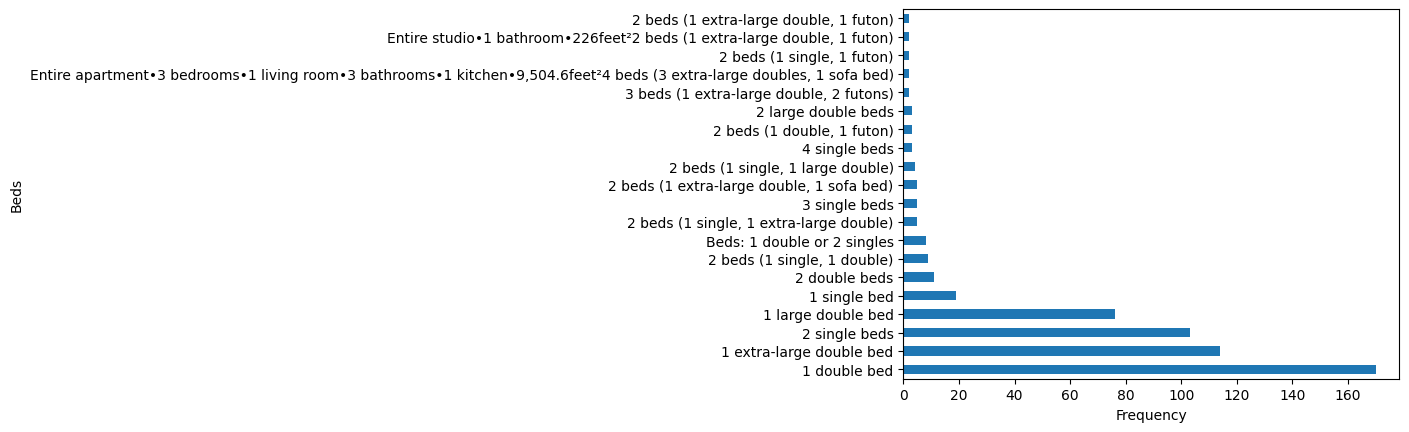

In [14]:
df['Beds'].value_counts().head(20).plot(kind='barh')
plt.xlabel('Frequency')

Filtering the data to only include hotels, removing entries pertaining to other entities such as apartments and villas. 

In [15]:
df['Name'] = df['Name'].str.lower()
df['Beds'] = df['Beds'].str.lower()

df = df[~df['Name'].str.contains('apartment', case=False, na=False)]
df = df[~df['Beds'].str.contains('apartment', case=False, na=False)]
df = df[~df['Beds'].str.contains('entire', case=False, na=False)]
df = df[~df['Name'].str.contains('Villa', case=False, na=False)]
df = df[~df['Beds'].str.contains('Villa', case=False, na=False)]

df.head(10)

/var/folders/hj/prlxmg59473bkfqgp33gw8tr0000gn/T/ipykernel_5522/62554259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'] = df['Name'].str.lower()
/var/folders/hj/prlxmg59473bkfqgp33gw8tr0000gn/T/ipykernel_5522/62554259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Beds'] = df['Beds'].str.lower()


Name     Price Rating  Review Count  \
0                    the orchard hotel lahore  17398.42    9.5           183   
1              rose palace hotel, garden town   5704.40    8.3          1630   
2                           hotel white pearl   4848.74    6.6           304   
3                  rose palace hotel, liberty   5989.62    8.3          1769   
5   best western premier hotel gulberg lahore  17113.20    8.4          1589   
6                   eden plus executive hotel   3422.64     10             2   
7         ramada by wyndham lahore gulberg ii  25669.80    9.0          1173   
9                        shelton hotel lahore   5133.96    7.8           508   
10                          luxus grand hotel  17683.64    9.2          1686   
11                         hotel grand lahore   4848.74    7.9           303   

    Distance                      Beds                       Room Type  \
0        4.2  1 extra-large double bed                     Deluxe Room   
1        4.1  1 extra-large double bed                     Deluxe Room   
2        6.8        1 large double bed            Standard Double Room   
3        3.3        1 large double bed                     Deluxe Room   
5        4.4  1 extra-large double bed                     Deluxe King   
6        7.5             2 single beds      Deluxe Double or Twin Room   
7        4.2  1 extra-large double bed  Deluxe King Room - Non-Smoking   
9        7.3              1 double bed              Deluxe Double Room   
10       0.4              1 double bed              Deluxe Double Room   
11       8.3             2 single beds              Standard Twin Room   

    Sustainable  Cancellation    City  ...  Location  Free WiFi  Lahore  \
0             3             1  Lahore  ...       9.7        9.0       1   
1             3             1  Lahore  ...       8.3        8.5       1   
2             2             1  Lahore  ...       7.9        7.9       1   
3             3             1  Lahore  ...       9.1        8.4       1   
5             3             1  Lahore  ...       8.9        8.0       1   
6             3             1  Lahore  ...      10.0       -1.0       1   
7             3             1  Lahore  ...       8.7        8.7       1   
9             0             0  Lahore  ...       7.9       -1.0       1   
10            0             1  Lahore  ...       8.9        8.8       1   
11            1             1  Lahore  ...       8.2        8.1       1   

    Islamabad  Karachi  Murree  Multan  Rawalpindi  Capacity  Number of Beds  
0           0        0       0       0           0         2               1  
1           0        0       0       0           0         2               1  
2           0        0       0       0           0         2               1  
3           0        0       0       0           0         2               1  
5           0        0       0       0           0         2               1  
6           0        0       0       0           0         2               2  
7           0        0       0       0           0         2               1  
9           0        0       0       0           0         2               1  
10          0        0       0       0           0         2               1  
11          0        0       0       0           0         2               2  

[10 rows x 25 columns]

Checking out the `Cleaned Dataframe`

In [16]:
df.head(10)

Name     Price Rating  Review Count  \
0                    the orchard hotel lahore  17398.42    9.5           183   
1              rose palace hotel, garden town   5704.40    8.3          1630   
2                           hotel white pearl   4848.74    6.6           304   
3                  rose palace hotel, liberty   5989.62    8.3          1769   
5   best western premier hotel gulberg lahore  17113.20    8.4          1589   
6                   eden plus executive hotel   3422.64     10             2   
7         ramada by wyndham lahore gulberg ii  25669.80    9.0          1173   
9                        shelton hotel lahore   5133.96    7.8           508   
10                          luxus grand hotel  17683.64    9.2          1686   
11                         hotel grand lahore   4848.74    7.9           303   

    Distance                      Beds                       Room Type  \
0        4.2  1 extra-large double bed                     Deluxe Room   
1        4.1  1 extra-large double bed                     Deluxe Room   
2        6.8        1 large double bed            Standard Double Room   
3        3.3        1 large double bed                     Deluxe Room   
5        4.4  1 extra-large double bed                     Deluxe King   
6        7.5             2 single beds      Deluxe Double or Twin Room   
7        4.2  1 extra-large double bed  Deluxe King Room - Non-Smoking   
9        7.3              1 double bed              Deluxe Double Room   
10       0.4              1 double bed              Deluxe Double Room   
11       8.3             2 single beds              Standard Twin Room   

    Sustainable  Cancellation    City  ...  Location  Free WiFi  Lahore  \
0             3             1  Lahore  ...       9.7        9.0       1   
1             3             1  Lahore  ...       8.3        8.5       1   
2             2             1  Lahore  ...       7.9        7.9       1   
3             3             1  Lahore  ...       9.1        8.4       1   
5             3             1  Lahore  ...       8.9        8.0       1   
6             3             1  Lahore  ...      10.0       -1.0       1   
7             3             1  Lahore  ...       8.7        8.7       1   
9             0             0  Lahore  ...       7.9       -1.0       1   
10            0             1  Lahore  ...       8.9        8.8       1   
11            1             1  Lahore  ...       8.2        8.1       1   

    Islamabad  Karachi  Murree  Multan  Rawalpindi  Capacity  Number of Beds  
0           0        0       0       0           0         2               1  
1           0        0       0       0           0         2               1  
2           0        0       0       0           0         2               1  
3           0        0       0       0           0         2               1  
5           0        0       0       0           0         2               1  
6           0        0       0       0           0         2               2  
7           0        0       0       0           0         2               1  
9           0        0       0       0           0         2               1  
10          0        0       0       0           0         2               1  
11          0        0       0       0           0         2               2  

[10 rows x 25 columns]

Displaying the 10 most frequent room types in the data. This gives us information as to what types of rooms may be more common and what types may be rarer or more expensive in hotels across Pakistan

Text(0.5, 0, 'Frequency')

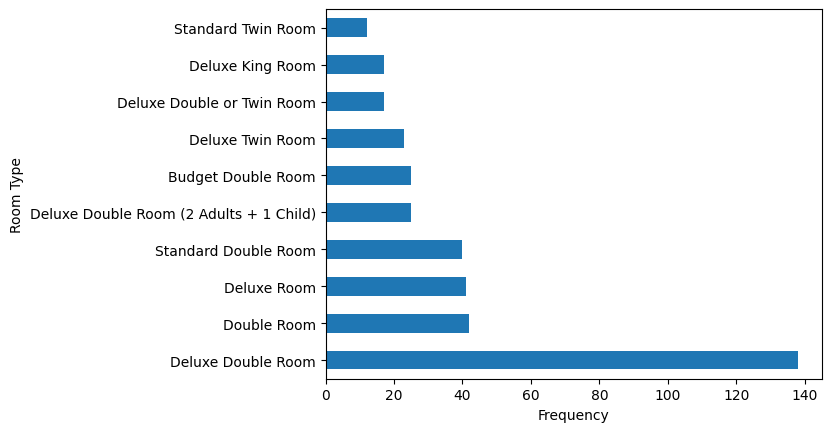

In [17]:
df['Room Type'].value_counts().head(10).plot(kind='barh')
plt.xlabel('Frequency')

Assigning numeric values for special cases in room types where the capacity has not been determined until now, and assigning numeric values to the `Room Quality` column

In [18]:
df['Room Type'].str.lower()
df['Capacity'] = df.apply(lambda row: 4 if any(keyword in row['Room Type'].lower() for keyword in ['family','suite']) else row['Capacity'], axis=1)
df['Room Quality'] = df['Room Type'].apply(lambda x: 3 if 'deluxe' in x.lower() or 'king' in x.lower() or 'suite' in x.lower() else (1 if 'economy' in x.lower() or 'budget' in x.lower() or 'basic' in x.lower() else 2))

Checking the `Data Types` for each of the columns in the Dataframe

In [19]:
df.dtypes

Name                object
Price              float64
Rating              object
Review Count         int64
Distance           float64
Beds                object
Room Type           object
Sustainable          int64
Cancellation         int64
City                object
Staff              float64
Facilities         float64
Cleanliness        float64
Comfort            float64
Value for money    float64
Location           float64
Free WiFi          float64
Lahore               int64
Islamabad            int64
Karachi              int64
Murree               int64
Multan               int64
Rawalpindi           int64
Capacity             int64
Number of Beds       int64
Room Quality         int64
dtype: object

Removing rows with invalid entries or missing values from the dataframe, and converting `Capacity` and `Rating` to usable, numeric values. 

In [20]:
df = df[~df.apply(lambda row: any(row == 'Not Found'), axis=1)]
df['Capacity'] = df['Capacity'].apply(pd.to_numeric, errors='coerce')
df = df[df['Capacity'] <10] #Removing outlier from the Capacity column 
df['Rating'] = df['Rating'].apply(pd.to_numeric, errors='coerce')
df = df.dropna()

#Checking the correlation between the variables
df.shape

(488, 26)

Plotting the 20 most frequent room types after replacing missing and invalid entries, interesting that some rooms such as **budget double room** are more frequent than others now in the updated plot. 

Text(0.5, 0, 'Frequency')

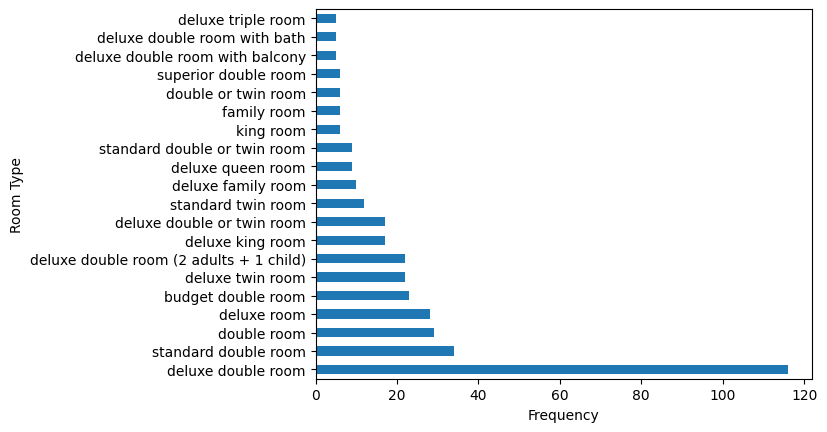

In [21]:
df['Room Type'] = df['Room Type'].str.lower()
df['Room Type'].value_counts().head(20).plot(kind='barh')
plt.xlabel('Frequency')

In [22]:
df['Free WiFi'].replace(-1,np.nan,inplace=True)
df['Cleanliness'].replace(-1,np.nan,inplace=True)
df['Comfort'].replace(-1,np.nan,inplace=True)
df['Facilities'].replace(-1,np.nan,inplace=True)
df['Staff'].replace(-1,np.nan,inplace=True)
df['Location'].replace(-1,np.nan,inplace=True)
df['Value for money'].replace(-1,np.nan,inplace=True)



df['Free WiFi'].fillna(np.mean(df['Free WiFi']),inplace=True)
df['Cleanliness'].fillna(np.mean(df['Cleanliness']),inplace=True)
df['Comfort'].fillna(np.mean(df['Comfort']),inplace=True)
df['Facilities'].fillna(np.mean(df['Facilities']),inplace=True)
df['Staff'].fillna(np.mean(df['Staff']),inplace=True)
df['Location'].fillna(np.mean(df['Location']),inplace=True)
df['Value for money'].fillna(np.mean(df['Value for money']),inplace=True)

Plotting histograms for all the column values along with the frequencies of those values. This is the distribution for all the columns. 

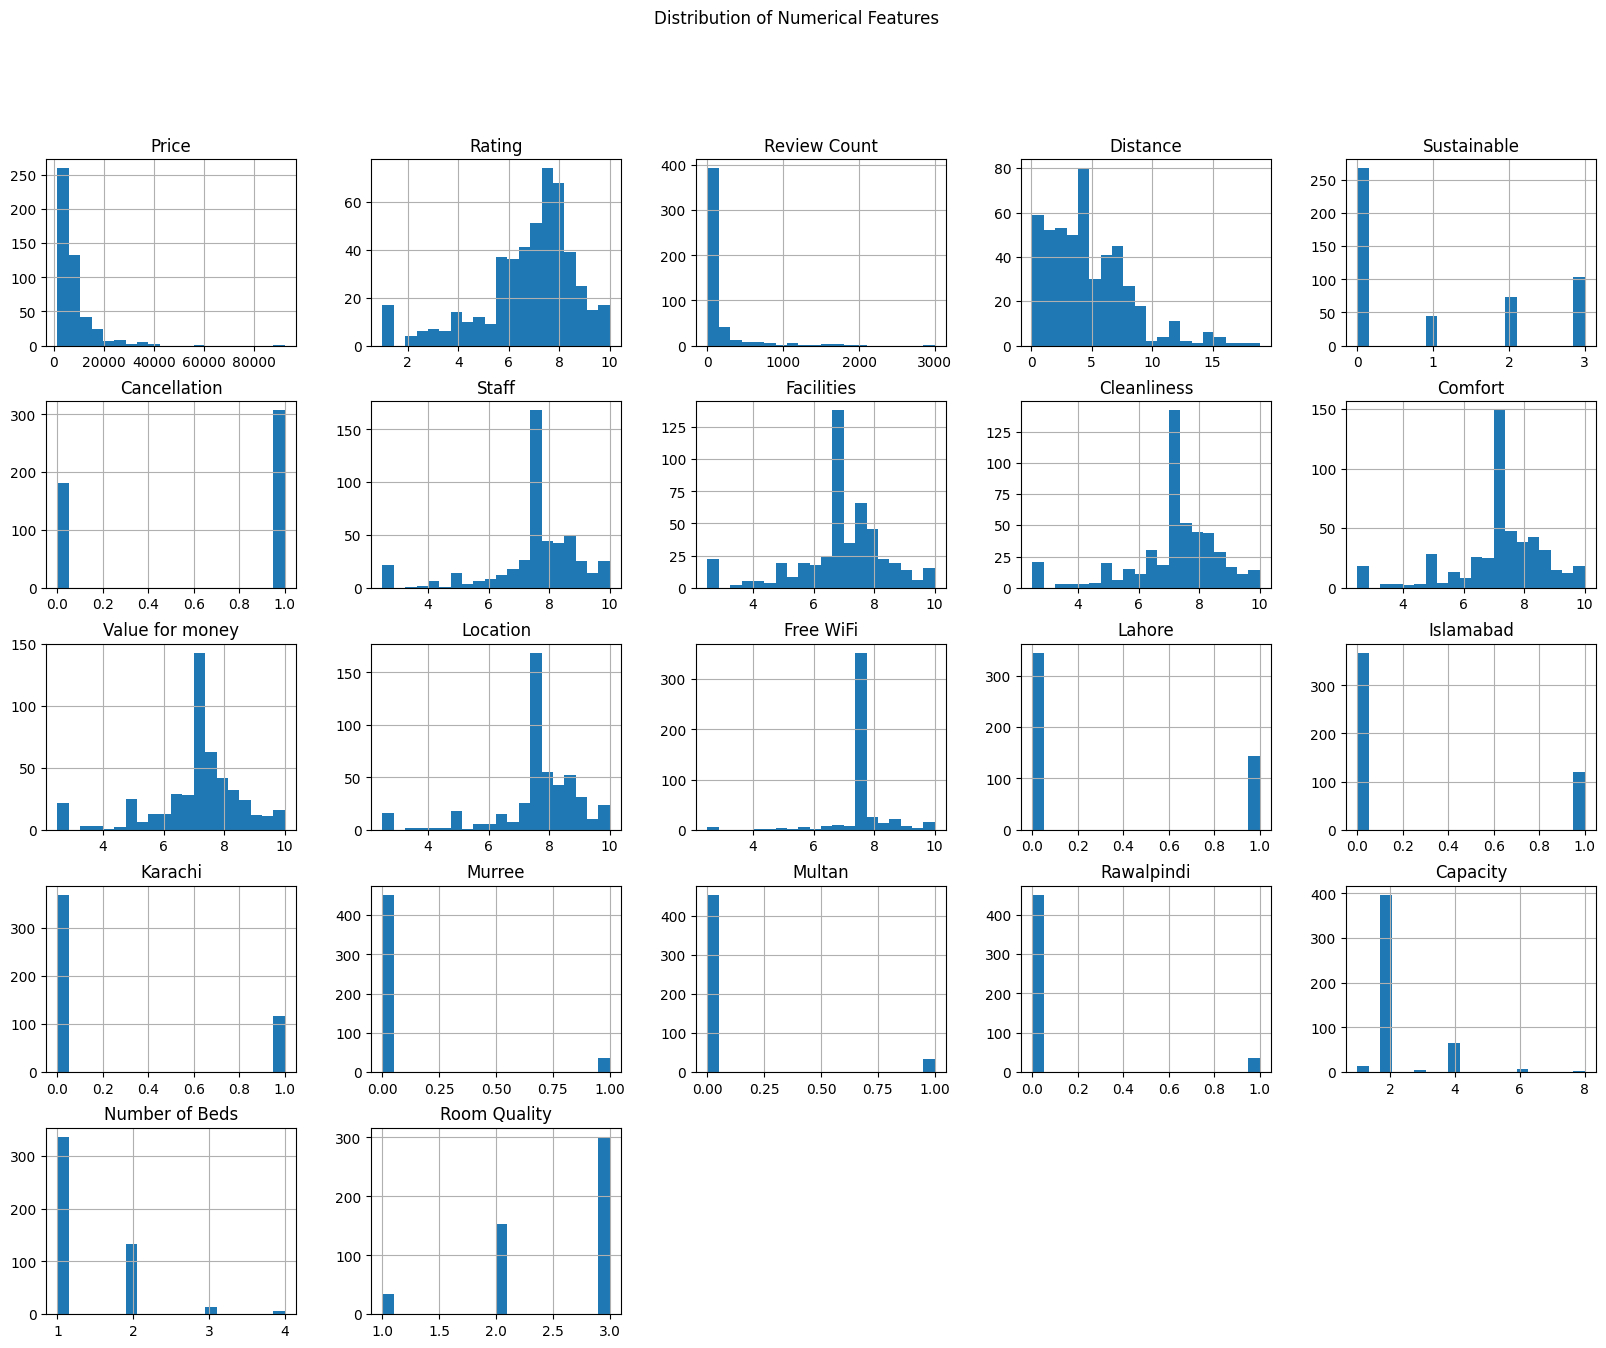

In [23]:
# Explore distribution of categorical features
df.hist(bins=20, figsize=(20,15))
plt.suptitle('Distribution of Numerical Features')

plt.show()

Making heatmap which shows correlation amongst different features of our dataset. Price has a decent correlation with Review Count and somewhat with Rating as well. Capacity and the Number of Beds also have a very strong correlation however that is to be expected since capacity is a derivative of the number of beds. 

<Axes: >

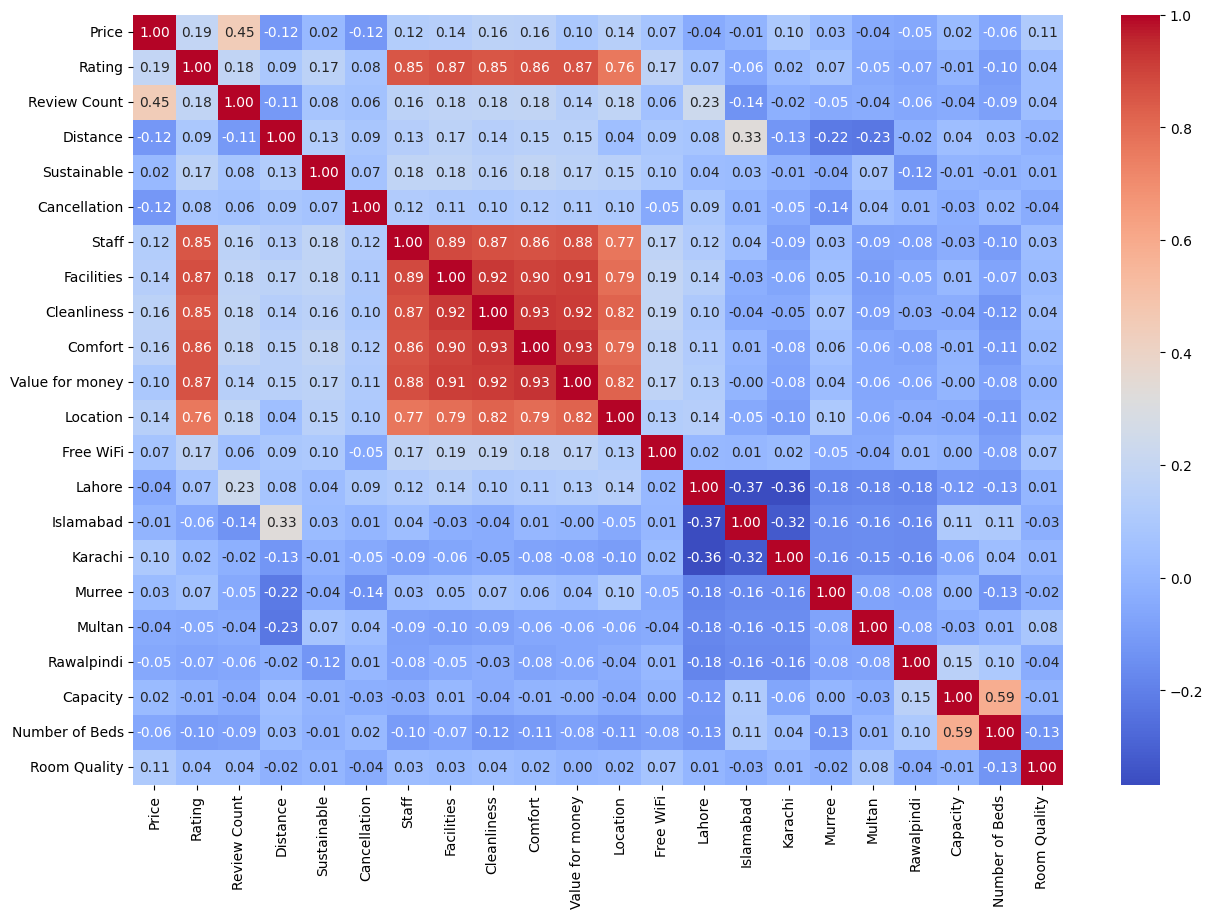

In [24]:
plt.figure(figsize=(15,10))
numeric_columns = df.select_dtypes(include='number')
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')

['Lahore', 'Islamabad', 'Karachi', 'Murree', 'Multan', 'Rawalpindi']


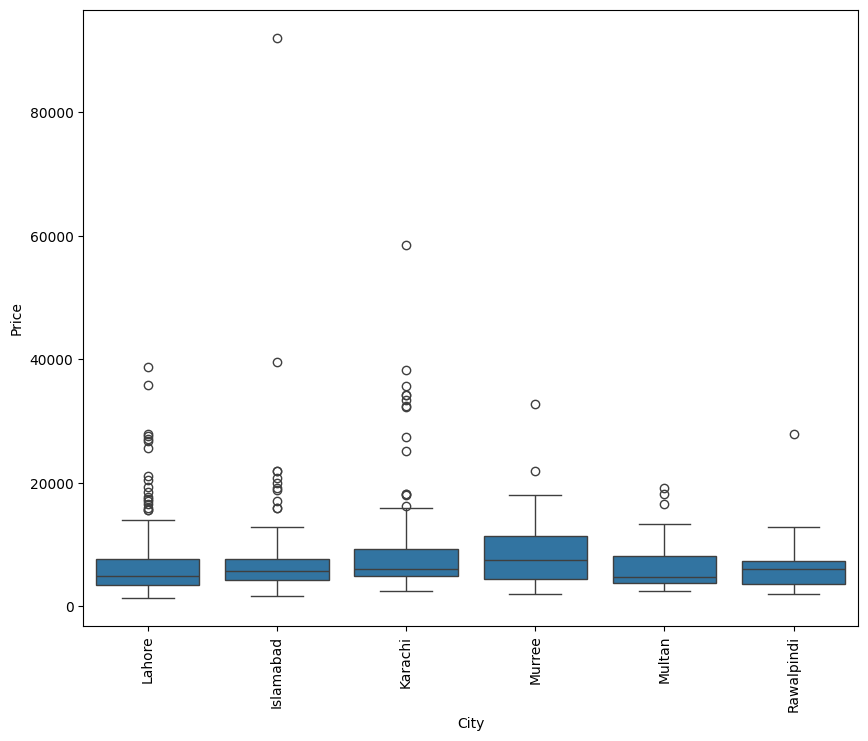

In [25]:
#Getting the unique cities
cities = df['City'].unique().tolist()
print(cities)

#Making a boxplot for each city to see the distribution of the prices
plt.figure(figsize=(10,8))
sns.boxplot(x='City', y='Price', data=df)
plt.xticks(rotation=90)
plt.show()

From the boxplot above it is no surprise that Murree has a greater median price and its interquartile range of prices is also greater than those of other cities since it is a popular tourist destination. Lahore, on the other hand might not be as popular because of the environmental conditions however it still is a big city and attracts wealthier customers even though the median price is the lowest. Multan has the closest packed distribution amongst the cities, probably due to the fact that Multan offers nothing special which other cities don't, and there may not be significant tourist spots in that region as well. The number of outliers in the metropolitan areas of Pakistan is significantly higher than in other cities but this is an expected outcome. 

The following box plot shows the distribution of Ratings across hotels in Pakistan in our dataset. 

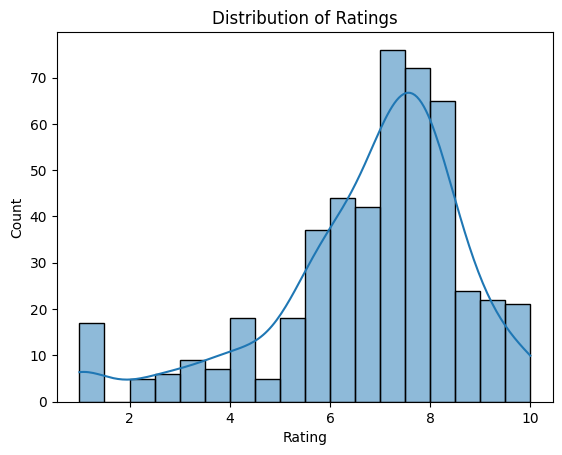

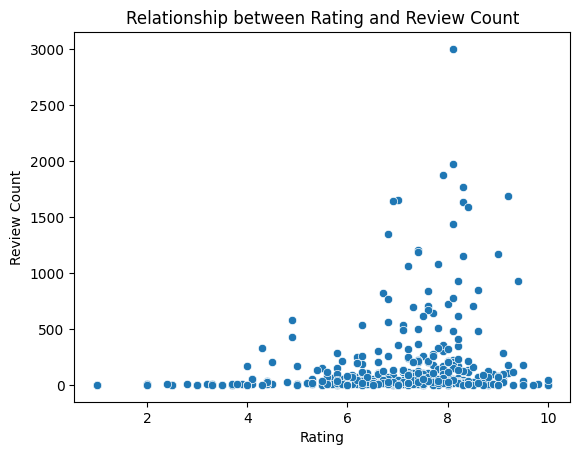

In [26]:
sns.histplot(df['Rating'], kde=True)
plt.title('Distribution of Ratings')
plt.show()

sns.scatterplot(x='Rating', y='Review Count', data=df)
plt.title('Relationship between Rating and Review Count')
plt.show()

We can observe that most rating values are round 7 to 8 which is a decent average score if we look at it from the perspective of the country. 
The scatterplot shows that for hotels with greater ratings, the review counts are greater as well which prove that ratings which are generally greater are more stable and indicative of the true quality of the hotel

Finally, to see a plot between each set of features, pair plot comes to our aid!

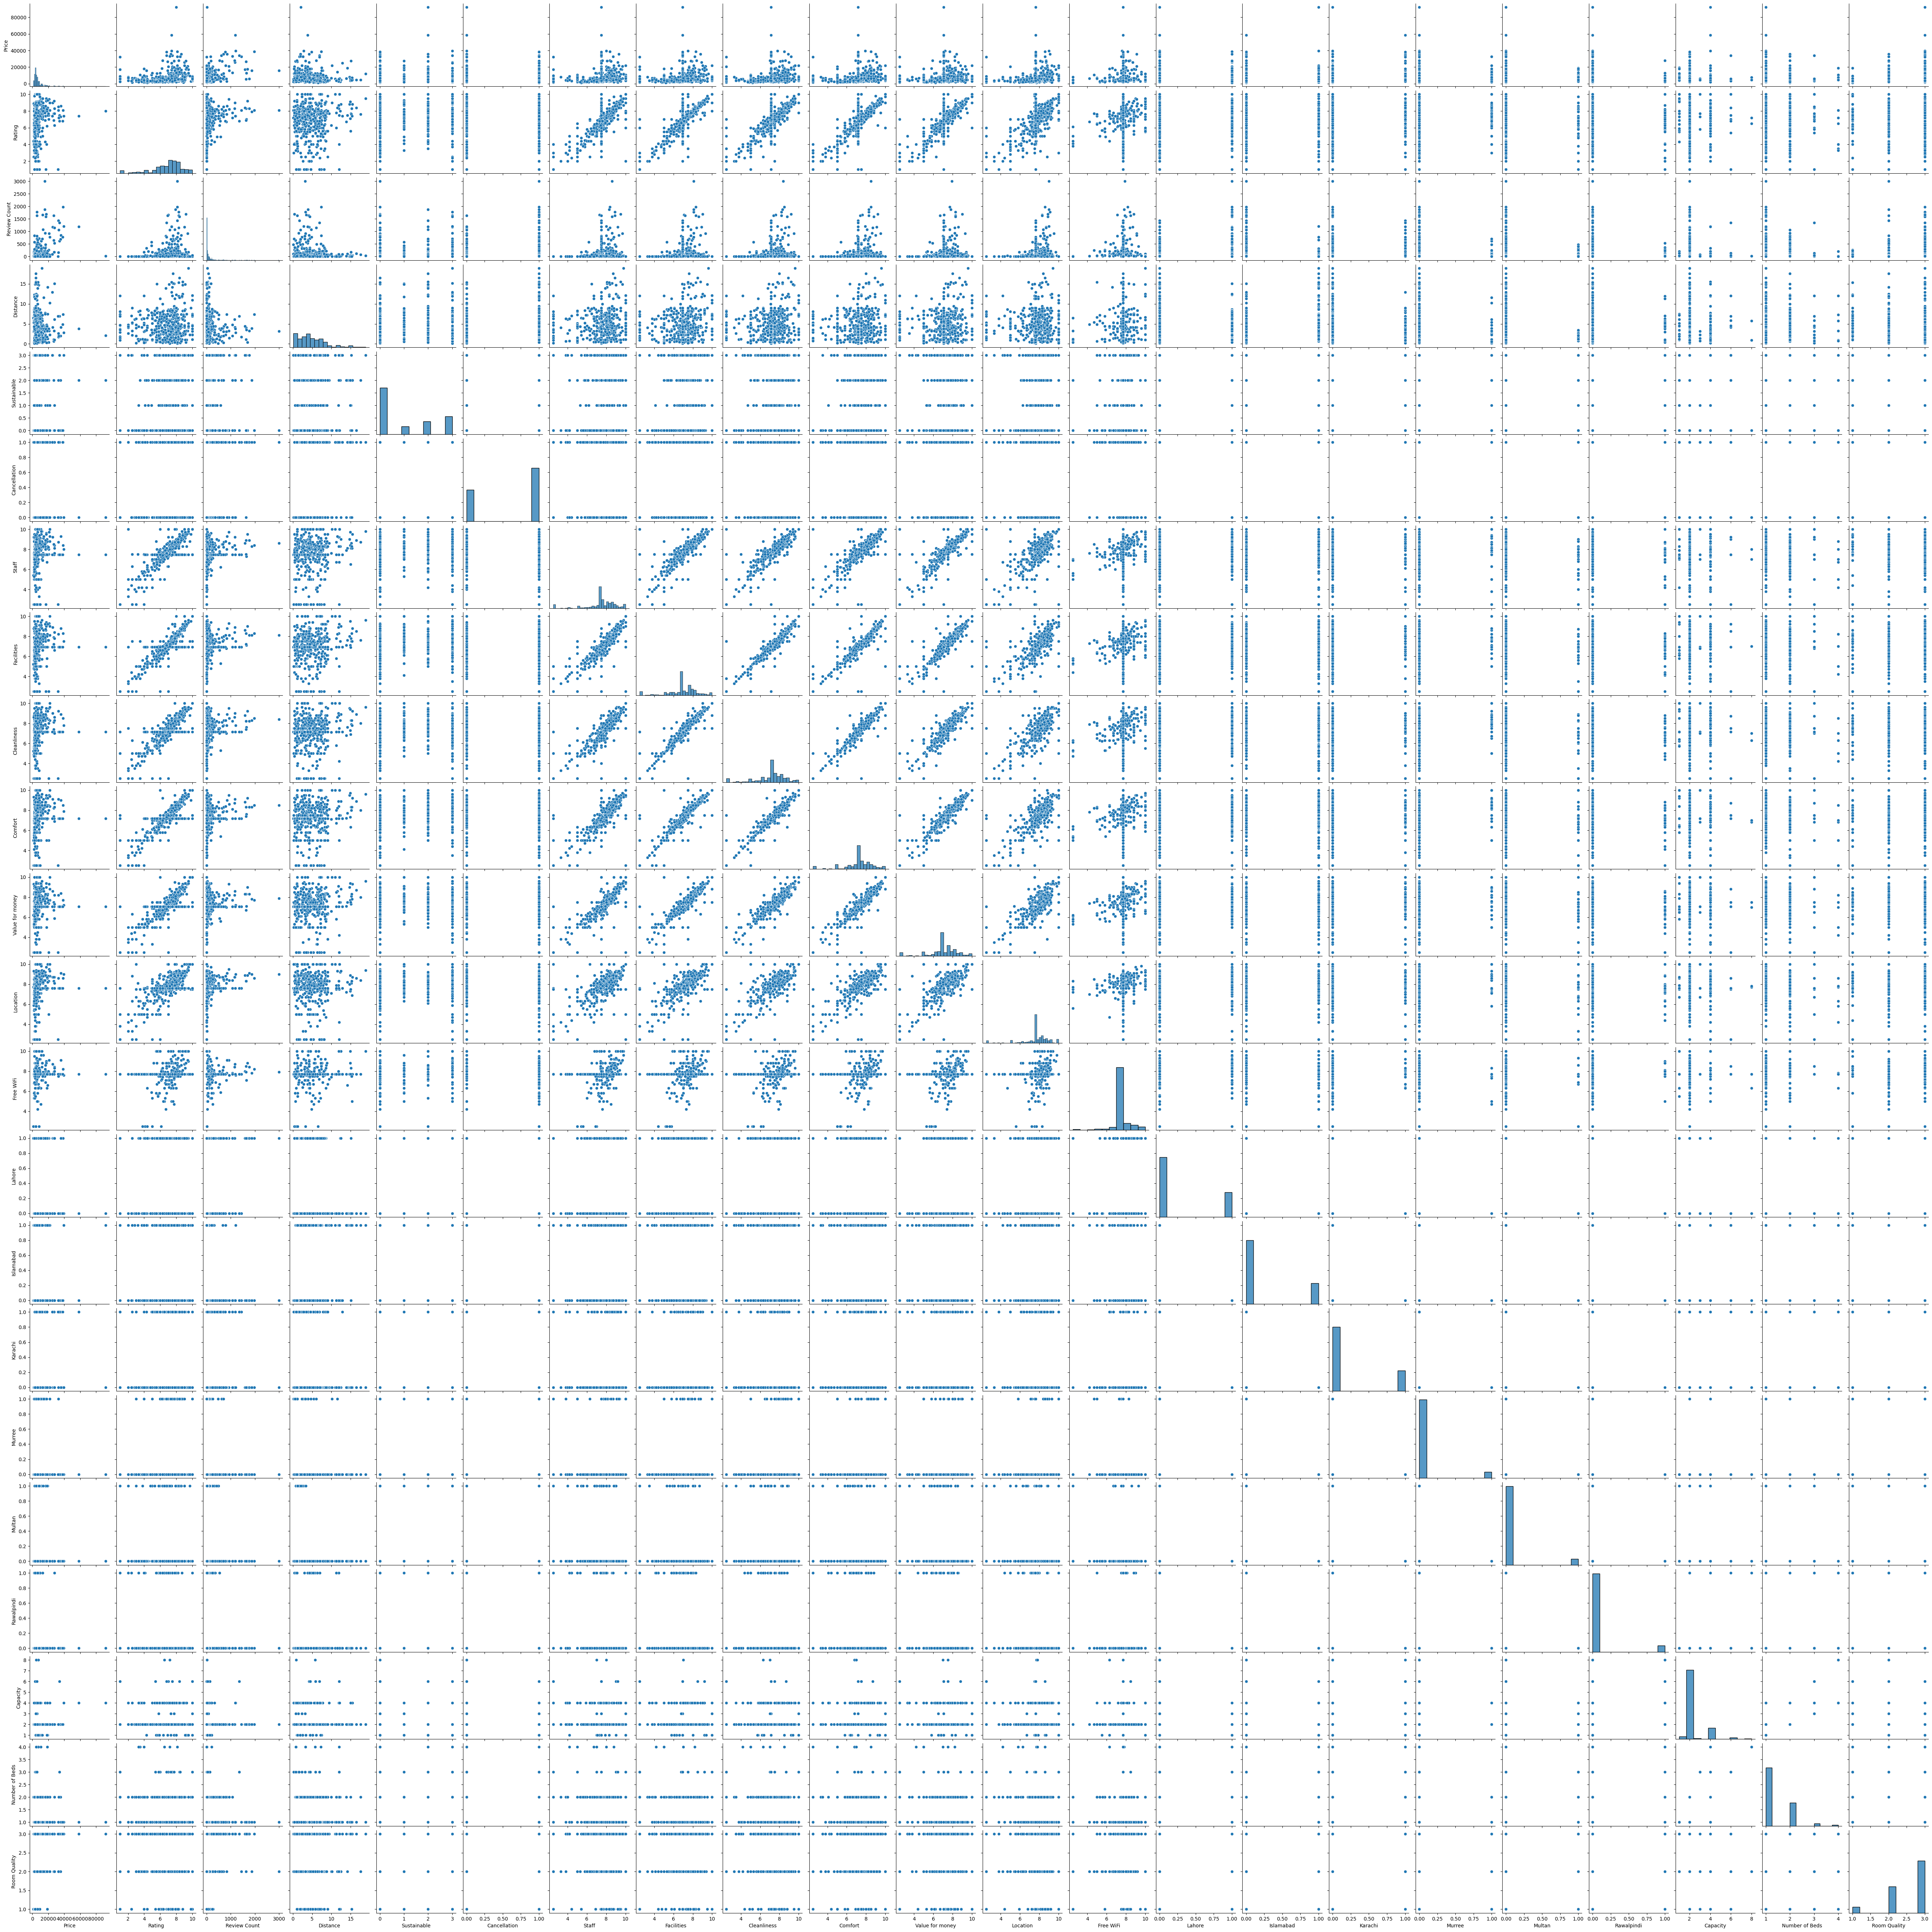

In [27]:
sns.pairplot(df)

# Machine Learning

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [29]:
Features = df.loc[:,['Rating', 'Review Count', 'Distance',
        'Sustainable', 'Cancellation', 'Staff',
       'Facilities', 'Cleanliness', 'Comfort', 'Value for money', 'Location',
       'Free WiFi', 'Lahore', 'Islamabad', 'Karachi', 'Murree', 'Multan',
       'Rawalpindi', 'Capacity', 'Number of Beds', 'Room Quality']]

Price = df['Price']

In [30]:
scaler = StandardScaler() #Since our features are not scaled
scaler.fit(Features)
Features = scaler.transform(Features)
X_train, X_test, y_train, y_test = train_test_split(Features, Price, random_state=40)


In [31]:
test_errors = []
train_errors = []
for i in range(1,15):
    rf_regressor = RandomForestRegressor(n_estimators=i*100, random_state=42)
    rf_regressor.fit(X_train,y_train)
    y_pred = rf_regressor.predict(X_test)
    y_pred_train =  rf_regressor.predict(X_train)
    mae = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)

    test_errors.append(mae)
    train_errors.append(mae_train)


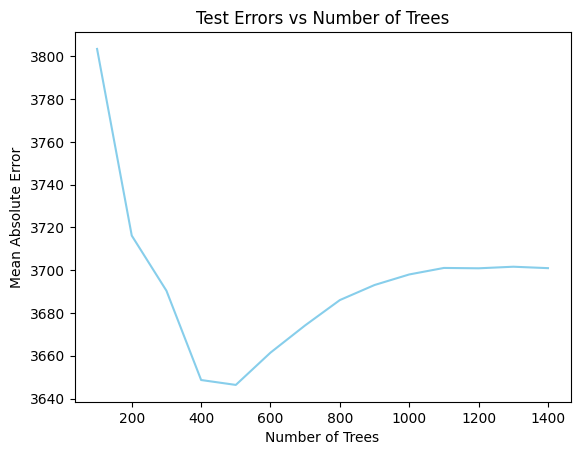

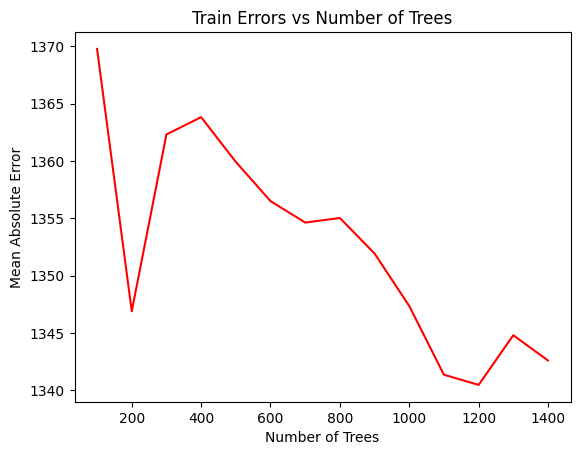

In [32]:
trees = [i*100 for i in range(1,15)]
plt.plot(trees,test_errors,color = 'skyblue')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Absolute Error')
plt.title('Test Errors vs Number of Trees')

plt.show()

plt.plot(trees,train_errors,color = 'red')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Absolute Error')
plt.title('Train Errors vs Number of Trees')
plt.show()


In [33]:
validation_errors = []
for i in range(1,15):
    model = RandomForestRegressor(n_estimators=i*100)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cross_val_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    validation_errors.append(cross_val_results.mean())



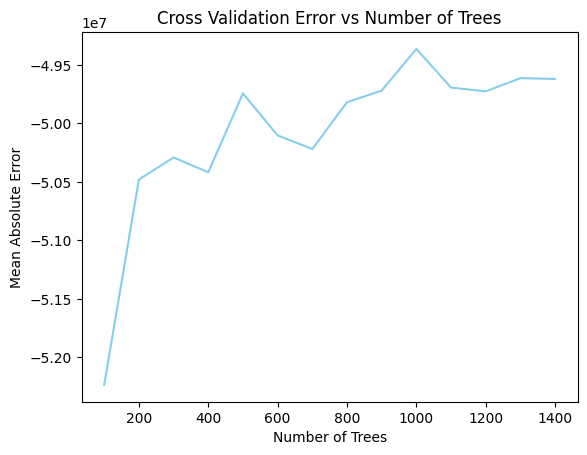

In [34]:
plt.plot(trees,validation_errors,color = 'skyblue')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Absolute Error')
plt.title('Cross Validation Error vs Number of Trees')

plt.show()
#Best value seems to be n=700

In [35]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train,y_train)
y_pred = rf_regressor.predict(X_test)
y_pred_train =  rf_regressor.predict(X_train)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute Error: {mae}')


Mean absolute Error: 3803.451560928962


Text(0.5, 1.0, 'Impact of features on Price')

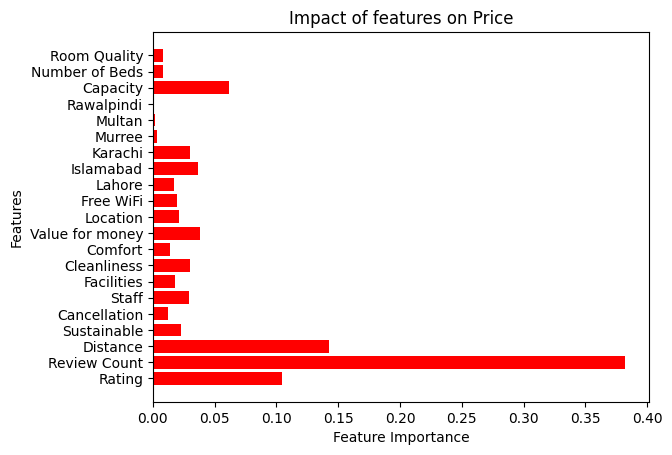

In [37]:
feature_importance = rf_regressor.feature_importances_
categories = ['Rating', 'Review Count', 'Distance',
        'Sustainable', 'Cancellation', 'Staff',
       'Facilities', 'Cleanliness', 'Comfort', 'Value for money', 'Location',
       'Free WiFi', 'Lahore', 'Islamabad', 'Karachi', 'Murree', 'Multan',
       'Rawalpindi', 'Capacity', 'Number of Beds', 'Room Quality']

plt.barh(categories,feature_importance,color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Impact of features on Price')


### Given a set of features, what expected price should a client be expecting?

To make the scenario more user friendly, each of the available features supported is taken as an input from the client from a range of 1 to 10 - where 1 denotes the feature is of least importance to the user and 10 denotes it is of utmost importance. Location is an exception, which is input as a string (note that our current version of the model is limited to 6 locations - lahore, karachi, islamabad, multan, murree, rawalpindi).

In [ ]:
Rating = 7
Popularity = 4
Distance_from_center = 4
Sustainability_level = 5
Cancellation_policy = 5
Staff_Quality = 3
Facilities_index = 4
Cleanliness = 10
Comfort = 10
Value_For_Money = 8
Location_quality = 7
Wifi_availability = 10
Location = 'lahore'
Capacity = 8
Room_Quality = 6

In [ ]:
manual_features = np.zeros(21)
if Location.lower() == 'lahore':
    manual_features[12] = 1
elif Location.lower() == 'islamabad':
    manual_features[13] = 1
elif Location.lower() == 'karachi':
    manual_features[14] = 1
elif Location.lower() == 'murree':
    manual_features[15] = 1 
elif Location.lower() == 'multan':
    manual_features[16] = 1
elif Location.lower() == 'rawalpindi':
    manual_features[17] = 1

Rating = np.percentile(df['Rating'],Rating*10)
Popularity =  np.percentile(df['Review Count'],Popularity*10)
Distance_from_center =  np.percentile(df['Distance'],Distance_from_center*10)
Sustainability_level =  np.percentile(df['Sustainable'],Sustainability_level*10)
Cancellation_policy =  np.percentile(df['Cancellation'],Cancellation_policy*10)
Staff_Quality =  np.percentile(df['Staff'],Staff_Quality*10)
Facilities_index =  np.percentile(df['Facilities'],Facilities_index*10)
Cleanliness = np.percentile(df['Cleanliness'],Cleanliness*10)
Comfort =  np.percentile(df['Comfort'],Comfort*10)
Value_For_Money =  np.percentile(df['Value for money'],Value_For_Money*10)
Location_quality =  np.percentile(df['Location'],Location_quality*10)
Wifi_availability =  np.percentile(df['Free WiFi'],Wifi_availability*10)
Location = 'Lahore'
Capacity =  np.percentile(df['Capacity'],Capacity*10)
Room_Quality =  np.percentile(df['Room Quality'],Room_Quality*10)

manual_features[0] = Rating
manual_features[1] = Popularity
manual_features[2] = Distance_from_center
manual_features[3] = Sustainability_level
manual_features[4] = Cancellation_policy
manual_features[5] = Staff_Quality
manual_features[6] = Facilities_index
manual_features[7] = Cleanliness
manual_features[8] = Comfort
manual_features[9] = Value_For_Money
manual_features[10] = Location_quality
manual_features[11] = Wifi_availability
manual_features[18] = Capacity
manual_features[20] = Room_Quality


manual_features = scaler.transform((manual_features).reshape(1,-1))

prediction = rf_regressor.predict(manual_features)
print("Your Expected Price for the given set of features is :",prediction)




Your Expected Price for the given set of features is : [7867.99742857]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Managerial Side

The other pressing question we aim to tackle is that given the set of features and their importances, what features should a client manager be prioritizing to maximize their profits?
In essence, what we want to see is a model for generating the net-profit for a hotel given a set of features.

Firstly, to begin building such a model, we would need interpretable weights which is not the case when using a RandomForest Regressor so we could tweak them to achieve a pseudo net-profit. Therefore, we start by using a linear classifier with L2 regularization to avoid overfitting.

In [38]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [39]:
lasso = Lasso(alpha=0.3,max_iter=10000) 
lasso.fit(X_train, y_train)

Lasso(alpha=0.3, max_iter=10000)

In [40]:
y_pred = lasso.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mae}')

Mean Absolute Error on Test Set: 4334.928436782907


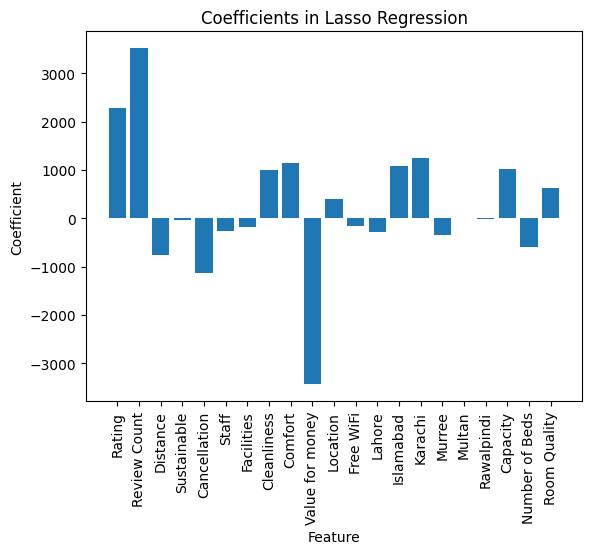

In [41]:
coefficients = lasso.coef_
intercept = lasso.intercept_

plt.bar(range(X_train.shape[1]), coefficients)
plt.xticks(range(X_train.shape[1]),categories, rotation=90)  # Include category names on x-axis
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Coefficients in Lasso Regression')
plt.show()

Therefore, to build such a model we want an associated cost to be associated with each feature to be able to generate the net-profit using the pricings we already have for every hotel.

For simplicity, we will associate the cost of each feature to be from a scale of 1 to 5, where 1 denotes the feature costs virtually nothing, while 5 denotes improvising this feature is extremely expensive. Also, we are assuming that costs can not go into negative i.e. revenue will always be generated, but will be scaled down. This is sufficient for our work since we aim to show the relationship of features with profits which can be achieved both ways.

Text(0.5, 1.0, 'Cost Index for each Feature')

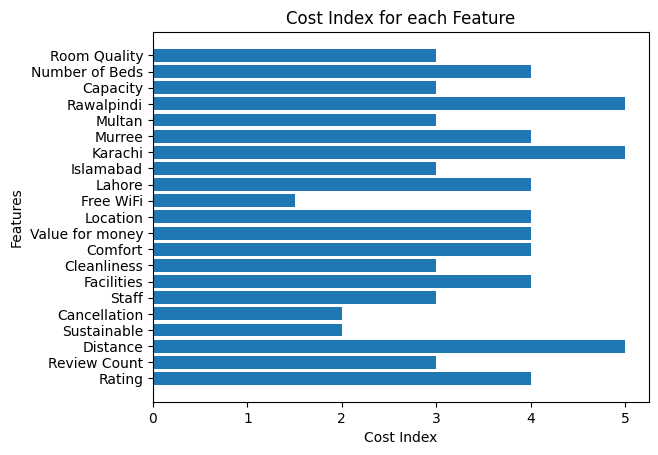

In [42]:
Rating_Cost = 4 #Assuming fake reviews can not be generated, one must be able to
Review_Count_Cost = 3 #Advertisement and the need to be popular
Distance_from_center_Cost = 5 #Areas near the center of the city can be drastically more expensive
Sustainability_level_Cost = 2 #More concerned with having an awareness than direct associated costs
Cancellation_policy_Cost = 2 #Unexpected cancellations can cost the hotel a complete room, but the policy can allows for more customers to consider it as a viable option
Staff_Quality_Cost = 3 # Labor is generally cheaper in Pakistan
Facilities_index_Cost = 4 #
Cleanliness_Cost = 3 # Assocated with Labor
Comfort_Cost = 4 # Installation and running of appliances such as A/Cs, Heaters, or Geasers is expensive considering the commercial rate of electricity
Value_For_Money_Cost= 4 # Related with cutting down profits to maximize user happiness
Location_quality_Cost = 4 #A hotel on a popular, or a well-connected location is expensive to form. Related to distance from the center index 
Wifi_availability_Cost = 1.5 # Internet access has become a lot more cheaper over time
Lahore_Cost = 4 #One of the prime cities of Pakistan
Rawalpindi_Cost = 3 
Islamabad_Cost = 5 # Owing to being capital of Pakistan
Karachi_Cost = 4
Multan_Cost = 3
Murree_Cost = 5 #Already congested, and a popular tourist spot
Number_of_beds_Cost = 3 # Furtniture can be relatively expensive
Capacity_Cost = 4 # Expensive to increase the size of a room with higher land rates
Room_Quality_Cost = 3 #Related to facilities and Comfort

Costs = np.array([Rating_Cost ,
Review_Count_Cost ,
Distance_from_center_Cost, 
Sustainability_level_Cost,
Cancellation_policy_Cost, 
Staff_Quality_Cost,
Facilities_index_Cost,  
Cleanliness_Cost ,
Comfort_Cost ,
Value_For_Money_Cost,
Location_quality_Cost,
Wifi_availability_Cost ,
Lahore_Cost ,
Rawalpindi_Cost,
Islamabad_Cost ,
Karachi_Cost, 
Multan_Cost ,
Murree_Cost ,
Number_of_beds_Cost ,
Capacity_Cost ,
Room_Quality_Cost])

plt.barh(categories,Costs)
plt.xlabel('Cost Index')
plt.ylabel('Features')
plt.title('Cost Index for each Feature')

Due to our limited data, one key assumption from here on would be to assume that we already know how the price is impacted by each of the features i.e. the feature importances we found form the ground truth data. This is necessary since to be able to look into net-profits, we would need an in-depth info about the costs of each of the features, which is unavailable in the dataset we have been able to procure. That said, if one could acquire that data, the rest of the methodology followed would almost remain the same. The purpose here is to make a virtual model that managers could use to gain better insights into modifying/constructing new hotels across Pakistan.

In [43]:
net_profit_scaled_features = np.zeros(21)
feature_costs = []
for idx,val in enumerate(Costs):
    curr_feature_gain = coefficients[idx]

    curr_feature_cost = 1-(0.2*(val-1)) #Essentially maps 5 to 0.2, 4 to 0.4, 3 to 0.6, 2 to 0.8, and 1 to 1.0 i.e. a high cost should decrease the net profit the most hence its value should be a minimizer when multiplied with the price. Similarly, 1 should incur no change to price and hence net-profit when multiplied and this is kept as is
    
    feature_costs.append(curr_feature_cost)
    net_profit_index = curr_feature_cost * curr_feature_gain
    net_profit_scaled_features[idx] = net_profit_index

In [44]:
net_profit_scaled_features = net_profit_scaled_features.reshape(1,21)
Features = Features.reshape(21,488)
net_profit_scaled_features.shape

(1, 21)

Now, we will use these updated features using our cost weights and previously found price features to generate pseudo-profit column for each of the hotels

In [45]:
pseudo_profits = np.dot(net_profit_scaled_features,Features)
pseudo_profits.shape

(1, 488)

Text(0.5, 1.0, 'Net Profit Distribution Across Hotels')

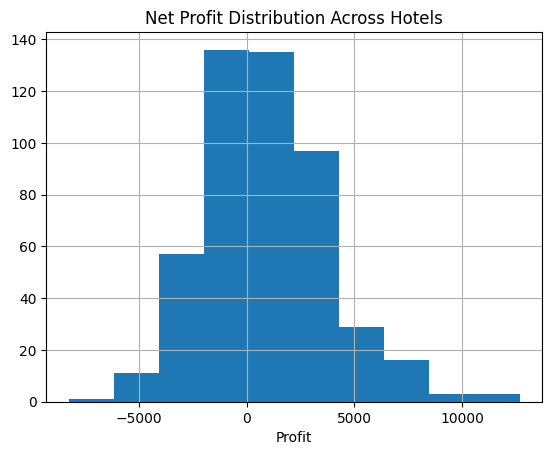

In [46]:
df['Modelled Net Profit'] = pseudo_profits.reshape(488,1)
df['Modelled Net Profit'].hist()
plt.xlabel('Profit')
plt.title('Net Profit Distribution Across Hotels')

Now, with our pseudo-profits in place, we can finally fit a Random Forest Regressor to be able to find the impact of each feature on our net-profit.

In [47]:
Features = df.loc[:,['Rating', 'Review Count', 'Distance',
        'Sustainable', 'Cancellation', 'Staff',
       'Facilities', 'Cleanliness', 'Comfort', 'Value for money', 'Location',
       'Free WiFi', 'Lahore', 'Islamabad', 'Karachi', 'Murree', 'Multan',
       'Rawalpindi', 'Capacity', 'Number of Beds', 'Room Quality']]


Net_Profit = df['Modelled Net Profit']
scaler = StandardScaler() 
scaler.fit(Features)
Features = scaler.transform(Features)
X_train, X_test, y_train, y_test = train_test_split(Features, Net_Profit, random_state=40)


validation_errors = []

for i in range(2,16):
    model = RandomForestRegressor(n_estimators=i*100)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cross_val_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    validation_errors.append(cross_val_results.mean())

Text(0.5, 1.0, 'Cross Validation Error vs Number of Trees')

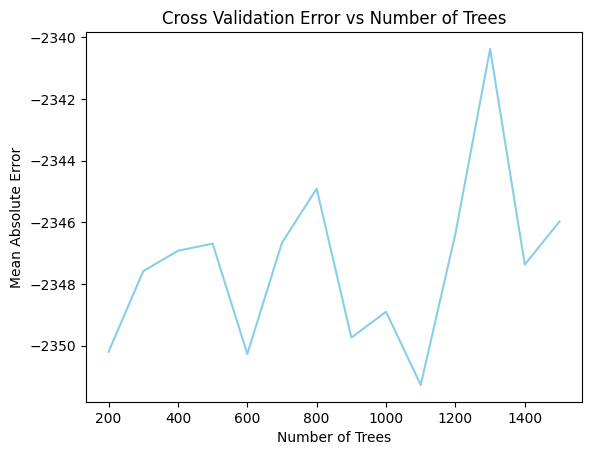

In [48]:
trees = [i*100 for i in range(2,16)]
plt.plot(trees,validation_errors,color = 'skyblue')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Absolute Error')
plt.title('Cross Validation Error vs Number of Trees')


As can be seen above, the optimal value for the trees hyperparameter ,using k-fold cross validation, given our problem seems to be about 400.

In [50]:
rf_regressor = RandomForestRegressor(n_estimators=110, random_state=42)
rf_regressor.fit(X_train,y_train)
y_pred = rf_regressor.predict(X_test)
y_pred_train =  rf_regressor.predict(X_train)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute Error: {mae}')


Mean absolute Error: 2437.4497571020534


Finally, we can now see which features, if improvised will result in generating the most net-profit for hotel managers in the context of Pakistan!
One key realization to keep in mind with these visualizations is that a single value of feature importance alone can never be enough to model this problem fully since we can not improvise on a single feature and keep generating profits. Instead, a better approach would be to model a distribution of net-profits as each of the features is varied - in real life we would expect the net-profits impact to start decreasing for a feature once it grows past a certain point. In essence, it is one of the limitations of our approach which could be improved upon in later works with more data.

That said, the current visualizations are still very useful if one looks at a given instance in time - especially if someone is looking to forge a hotel-business in Pakistan.

Text(0.5, 1.0, 'Impact of features on Net Profit')

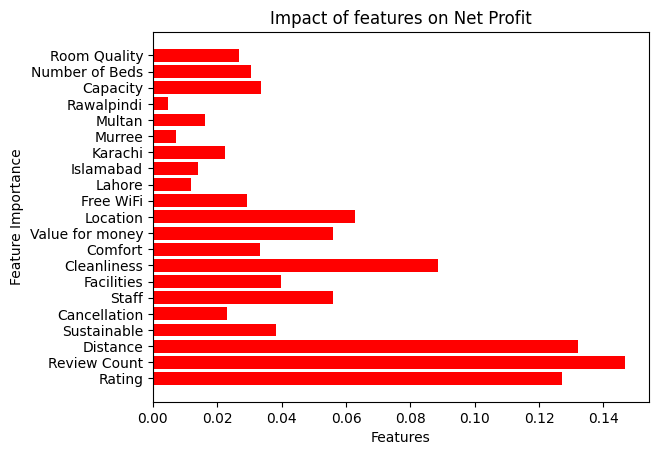

In [52]:
feature_importance = rf_regressor.feature_importances_
categories = ['Rating', 'Review Count', 'Distance',
        'Sustainable', 'Cancellation', 'Staff',
       'Facilities', 'Cleanliness', 'Comfort', 'Value for money', 'Location',
       'Free WiFi', 'Lahore', 'Islamabad', 'Karachi', 'Murree', 'Multan',
       'Rawalpindi', 'Capacity', 'Number of Beds', 'Room Quality']

plt.barh(categories,feature_importance,color='red')
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Impact of features on Net Profit")